In [1]:
# Import packages and data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

titanic = pd.read_csv("Titanic.csv")

In [2]:
# Drops unnecessary columns
titanic.drop(["Name", "PassengerId", "Cabin", "Ticket", "Parch"], axis=1, inplace=True)
print(titanic.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')


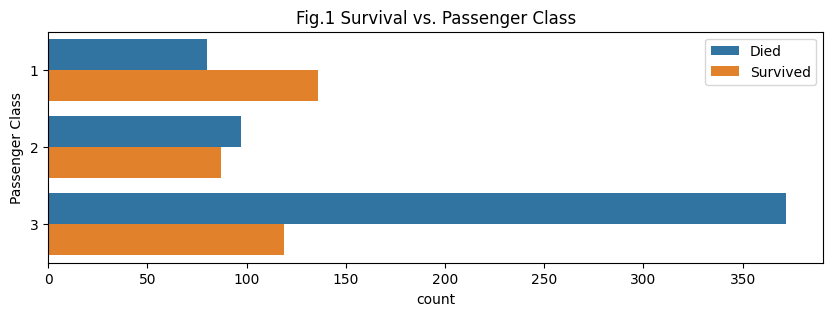

In [3]:
# Survival Based on Class
plt.figure(figsize=[10,3])
sns.countplot(data=titanic, y="Pclass", hue="Survived")
plt.title("Fig.1 Survival vs. Passenger Class")
plt.ylabel("Passenger Class")
plt.legend(["Died", "Survived"])



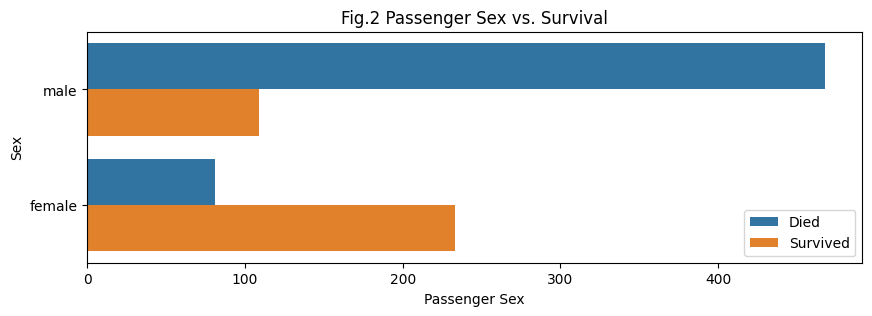

In [4]:
# Survival Based on Sex
plt.figure(figsize=[10,3])
sns.countplot(data=titanic, y="Sex", hue="Survived")
plt.title("Fig.2 Passenger Sex vs. Survival")
plt.xlabel("Passenger Sex")
plt.legend(["Died", "Survived"])


Text(0.5, 1.0, 'Fig.3 Passenger Sex vs. Class')

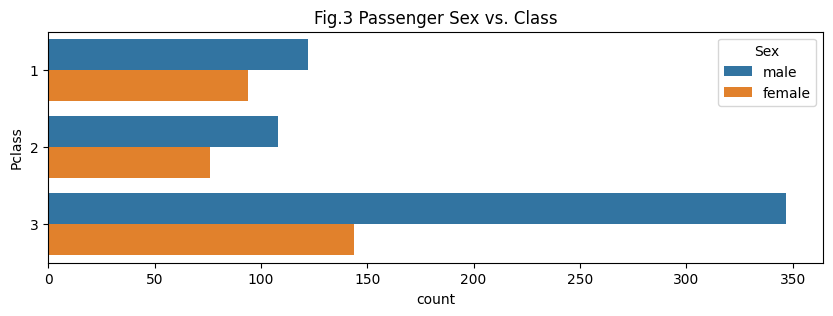

In [5]:
# Class based on Gender
plt.figure(figsize=[10,3])
sns.countplot(data=titanic, y="Pclass", hue="Sex")
plt.title("Fig.3 Passenger Sex vs. Class")


Text(0.5, 0, 'Passenger Class')

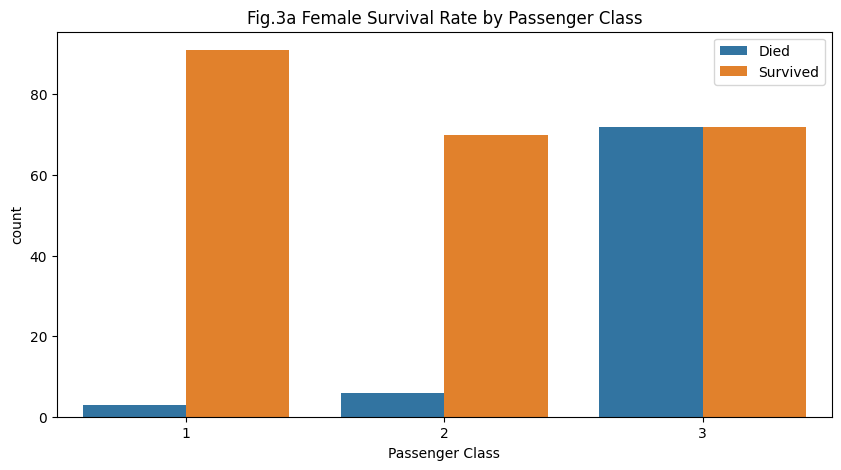

In [6]:
# Female Survival Rate by Passenger Class
female_survival = titanic.copy()
female_survival = female_survival[female_survival["Sex"] == "female"]

plt.figure(figsize=[10,5])
sns.countplot(data=female_survival, x="Pclass", hue="Survived")
plt.title("Fig.3a Female Survival Rate by Passenger Class")
plt.legend(["Died", "Survived"])
plt.xlabel("Passenger Class")

Text(0.5, 0, 'Passenger Class')

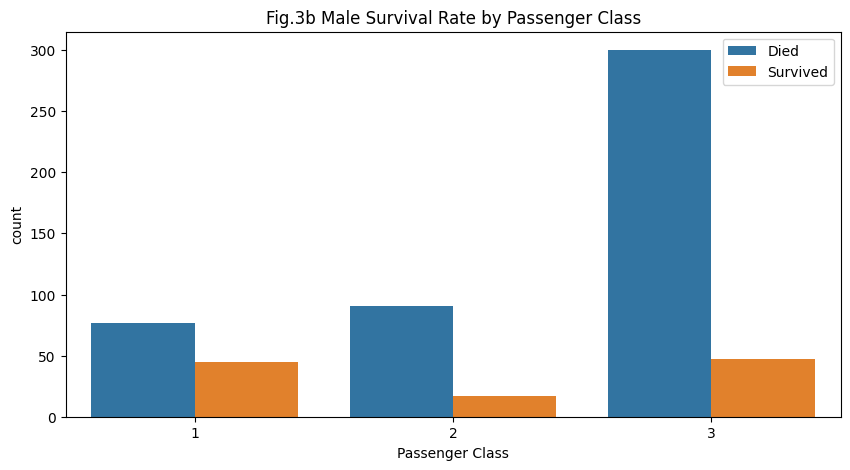

In [7]:
# Male Survival Rate by Passenger Class
male_survival = titanic.copy()
male_survival = male_survival[male_survival["Sex"] == "male"]

plt.figure(figsize=[10,5])
sns.countplot(data=male_survival, x="Pclass", hue="Survived")
plt.title("Fig.3b Male Survival Rate by Passenger Class")
plt.legend(["Died", "Survived"])
plt.xlabel("Passenger Class")

False    714
True     177
Name: Age, dtype: int64


Text(0, 0.5, 'Age Group')

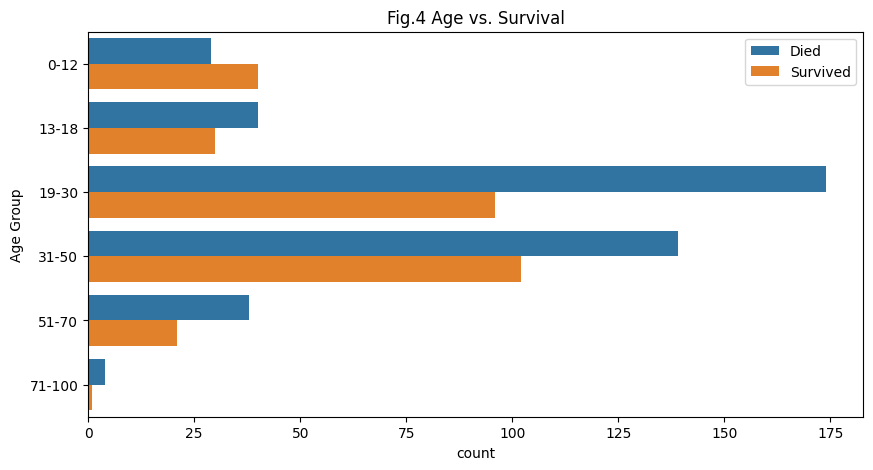

In [8]:
# Survival vs. Age

survival_vs_age = titanic.copy()
survival_vs_age.loc[:,"Age_groups"] = pd.cut(survival_vs_age.loc[:,"Age"], 
                                [0, 12, 18, 30, 50, 70, 100],
                                labels=["0-12","13-18","19-30","31-50","51-70","71-100"])

print(titanic.Age.isnull().value_counts())

plt.figure(figsize=[10,5])
sns.countplot(data=survival_vs_age, y="Age_groups", hue="Survived")
plt.title("Fig.4 Age vs. Survival")
plt.legend(["Died", "Survived"])
plt.ylabel("Age Group")

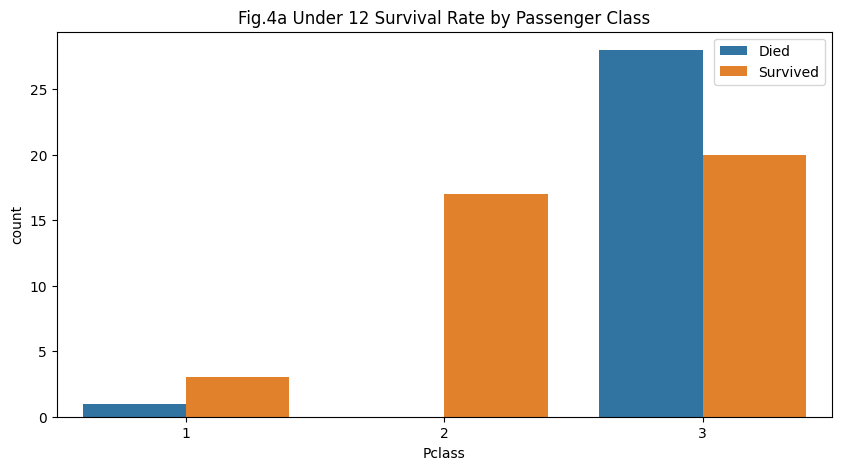

In [9]:
# Under 12 Survival Rate by Passenger Class 
under12 = titanic[titanic["Age"] <= 12]

plt.figure(figsize=[10,5])
sns.countplot(data=under12, x="Pclass", hue="Survived")
plt.title("Fig.4a Under 12 Survival Rate by Passenger Class")
plt.legend(["Died", "Survived"])

### Analysis of Survival Rates by Class, Sex and Age ###

As can be seen in Fig.1, passenger class had a dramatic effect on the likelihood of survival. First class passengers were more than 50% likely to survive, whilst second class was just below that, with third class passengers having the worst deal with only around a quarter survivng. This fits with the fact that first class
passengers had priority and easier access to lifeboats.

Fig.2 shows us that the chances of survival on the Titanic were also drastically affected by the gender of the passenger, with nearly three quarters of female passengers surviving, and only around a fifth of males. This however may be as much due to class as due to gender, as we can see in Fig.3 that the large majority of Third class was made up by males, perhaps contributing to the higher number of male deaths. The importance of class in survival rates is perhaps best demonstrated by Fig.3a, which shows that female passengers in third class had just under 50% survival rates, whilst female passengers in 2nd and 1st class had something in the region of 80%-90% survival rates. This disparity is even more extreme in Fig.3b, where 3rd class male passengers had an abysmal survial rate, with roughly only 1 in 7 surviving.

As can be seen in Fig.4, the only age group that had a majority survival rate was 0-12, lending creedence to the idea that children were prioritised in escape efforts. It is worth noting that there are a large number of null
values in this field however, so there is a possibility that survival rates for each group are misleading. Rather sadly, the class divide also seems to be present in under 12's survival rate, with Fig.4a showing that young children in third class has a markedly worse survival rate than those in 1st and 2nd class.



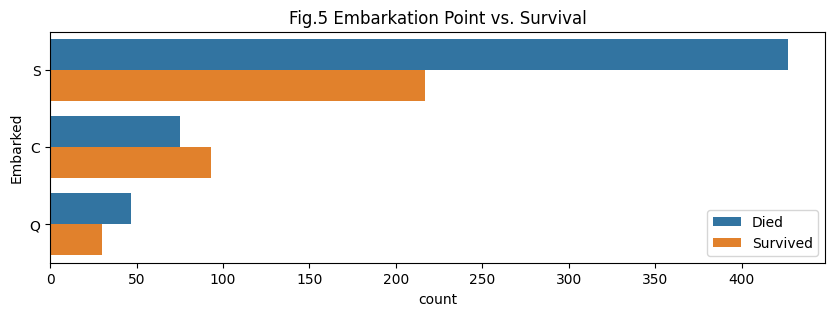

In [10]:
# Embarkation vs. Survival
plt.figure(figsize=[10,3])
sns.countplot(data=titanic, y="Embarked", hue="Survived")
plt.title("Fig.5 Embarkation Point vs. Survival")
plt.legend(["Died", "Survived"])

Text(0.5, 1.0, 'Fig.6 Passenger Class by Embarkation Point')

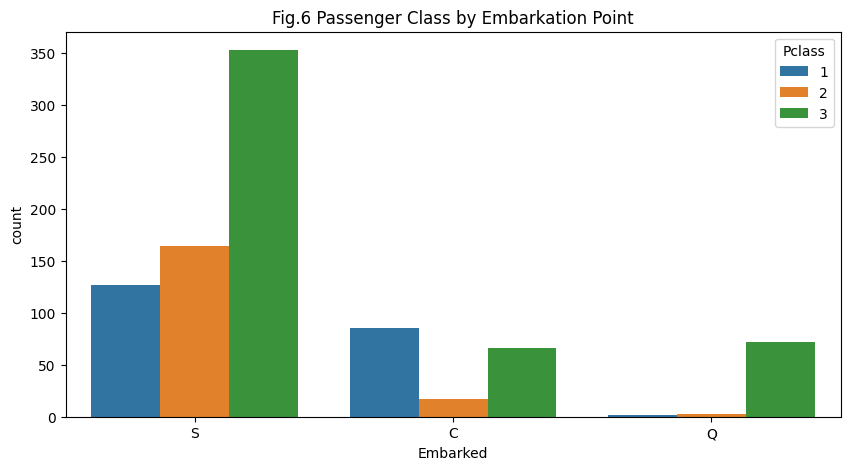

In [11]:
# Passenger Class by Embarkation Point
plt.figure(figsize=[10,5])
sns.countplot(data=titanic, x="Embarked", hue="Pclass")
plt.title("Fig.6 Passenger Class by Embarkation Point")

Text(0.5, 1.0, 'Fig.7 Sex by Embarkation Point')

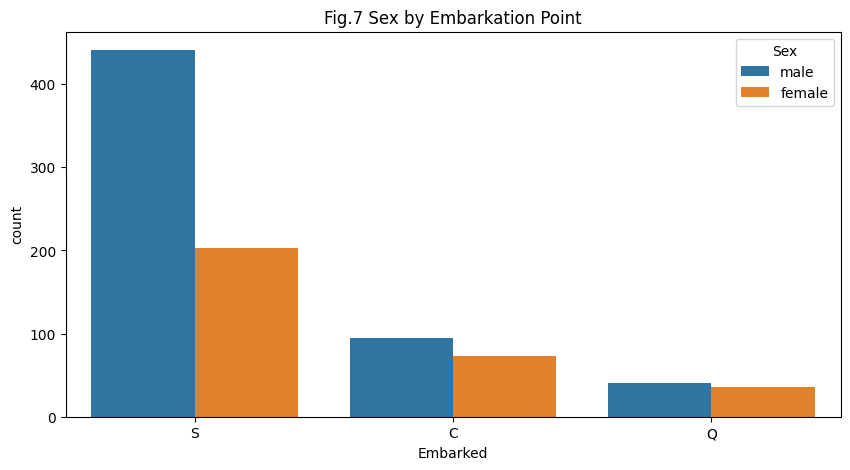

In [12]:
# Sex by Embarkation Point
plt.figure(figsize=[10,5])
sns.countplot(data=titanic, x="Embarked", hue="Sex")
plt.title("Fig.7 Sex by Embarkation Point")

### Analysis of Survival Rate by Embarkation Location ###

As can be seen in Fig.5, Cherbourg was the only port from which the majority of passengers survived. This can likely be explained by the information in the second graph Fig.6, which shows that around 50% of passengers that embarked at Cherbourg were first class, whilst at the other two ports, Southampton and Queenstown, passengers were mostly second or third class.

It can be noted that, despite Queenstown having an overwhelmingly third class clientele, it still had a better survival rate than the clientele from Southhampton, which also had a large number of second class passengers.
This may be explained by the third graph - Fig.7 - which shows that the clientele from Queenstown were almost equally divided between male and female, so the previously mentioned high survival rate for female passengers likely had a strong influence on the relatively high survival rate for Queenstown. Southampton meanwhile had a large male majority in it's clientele, which would explain the lower survival rate despite an overall higher general passenger class.